# Iris dataset
## Kaggle challenge

You can download the dataset there: [Iris download](https://www.kaggle.com/uciml/iris/downloads/iris-species.zip)

## Goal

We are given iris stats (petal & sepal's length & width) coming from three sub-species.
While any good gardener could correctly tell apart each kinds of Iris sub-species, I would be very bad at this job.

Hopefully I know Data Science! We are going to do a better job than the gardener!

In [1]:
%matplotlib inline

import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

## Loading the dataset

In [2]:
iris = pd.read_csv('Iris.csv')

First thing to do with a dataset is to get a quick idea of its structure:

In [3]:
iris.drop('Id', axis=1, inplace=True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

/Users/arthur/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


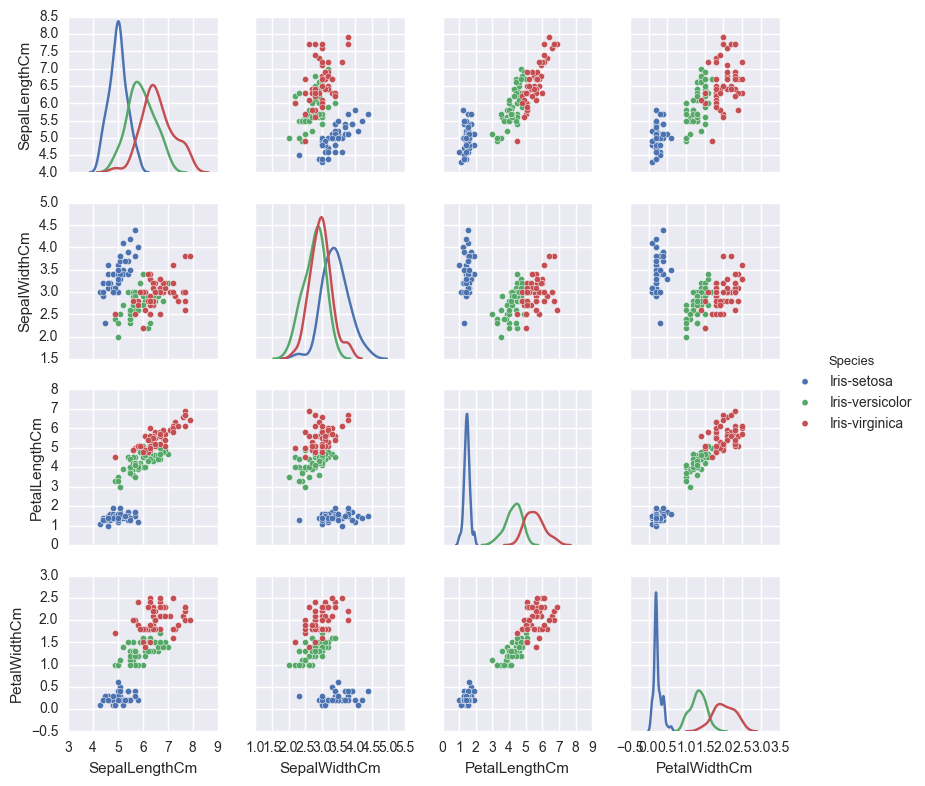

In [5]:
sns.pairplot(iris, hue='Species', size=2, diag_kind='kde')

The diagonal plots are using ```kde``` ([Kernel Density Estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation)).

With those we can see that the best way for a gardener to spot a **Setosa** would be to look at the Petal shape and not the Sepal shape.

##  Preparing the data

Now we split the data between the features (Petal & Sepal) and the target labels (**Setosa**, **Versicolor**, and **Virginica**.)

Then we use the ```train_test_split``` function from scikit-learn to have two pair of feature-target set: One for the training phase and for the test phase. 

In [6]:
x, y = iris[iris.columns[:4]], iris[iris.columns[4]]

In [7]:
enc = LabelEncoder()
y = enc.fit_transform(y)

seed = 1337
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=test_size,
                                                    random_state=seed)

## Random Forest

We are going to use a Random Forest Classifier, but many other models could be used for this problem.

In [8]:
tree = RandomForestClassifier()

In [9]:
tree.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

## Testing

Let's test our trained RandomForest on the test dataset:

In [10]:
tree.score(x_test, y_test)

0.97777777777777775

Well, not bad?

## Feature importances

We have guessed previously, based on graphical informations from the plots, that the petal's width & length seemed to be far more important in the species classification process.

Let's see if are right!

In [11]:
for name, importance in zip(x_train.columns, tree.feature_importances_):
    print('{0} has an importance of {1}.'.format(name, importance))

SepalLengthCm has an importance of 0.0998656684733036.
SepalWidthCm has an importance of 0.027452856744883687.
PetalLengthCm has an importance of 0.4098027353162621.
PetalWidthCm has an importance of 0.46287873946555064.


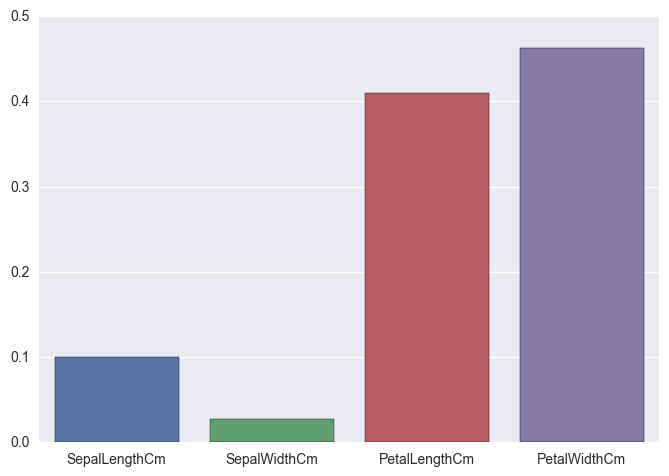

In [12]:
sns.barplot(x=x_train.columns, y=tree.feature_importances_)

We were right! Sepal seems to be quite the same whether the iris sub-species.